In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from tqdm import trange
%matplotlib inline

# Load data

In [2]:
ngram=3

df0 = pd.read_csv('BOW-datasets/BOW_{}-gram_class0.csv'.format(ngram), header=0, index_col=0)
df1 = pd.read_csv('BOW-datasets/BOW_{}-gram_class1.csv'.format(ngram), header=0, index_col=0)

X0 = df0.values
X1 = df1.values
feat_names = df0.columns

print(X0.shape)
print(X1.shape)

(284718, 854)
(25949, 854)


In [3]:
# Create a balanced training set
n = X1.shape[0]

# Subsample X1
idx = np.arange(n)
np.random.shuffle(idx)
X1_small = X1[idx, :]
id1 = df1.index[idx]

# Subsample X0
idx = np.arange(n)
np.random.shuffle(idx)
X0_small = X0[idx, :]
id0 = df0.index[idx]

# Stack them
x_train = np.vstack((X1_small, X0_small))
y_train = np.hstack((np.ones(X1_small.shape[0]), np.zeros(X0_small.shape[0])))
id_train = id1.tolist()+id0.tolist()
print(x_train.shape)
print(y_train.shape)

(51898, 854)
(51898,)


# Evaluate Lasso path

In [8]:
# Evaluate the Lasso-path
nC = 20
coefs = np.empty((x_train.shape[1], nC))
C_range = np.logspace(-5, 0, nC)
for i in trange(nC):
    coefs[:, i] = LogisticRegression(penalty='l1', C=C_range[i]).fit(x_train, y_train).coef_

100%|██████████| 20/20 [1:57:44<00:00, 353.23s/it]


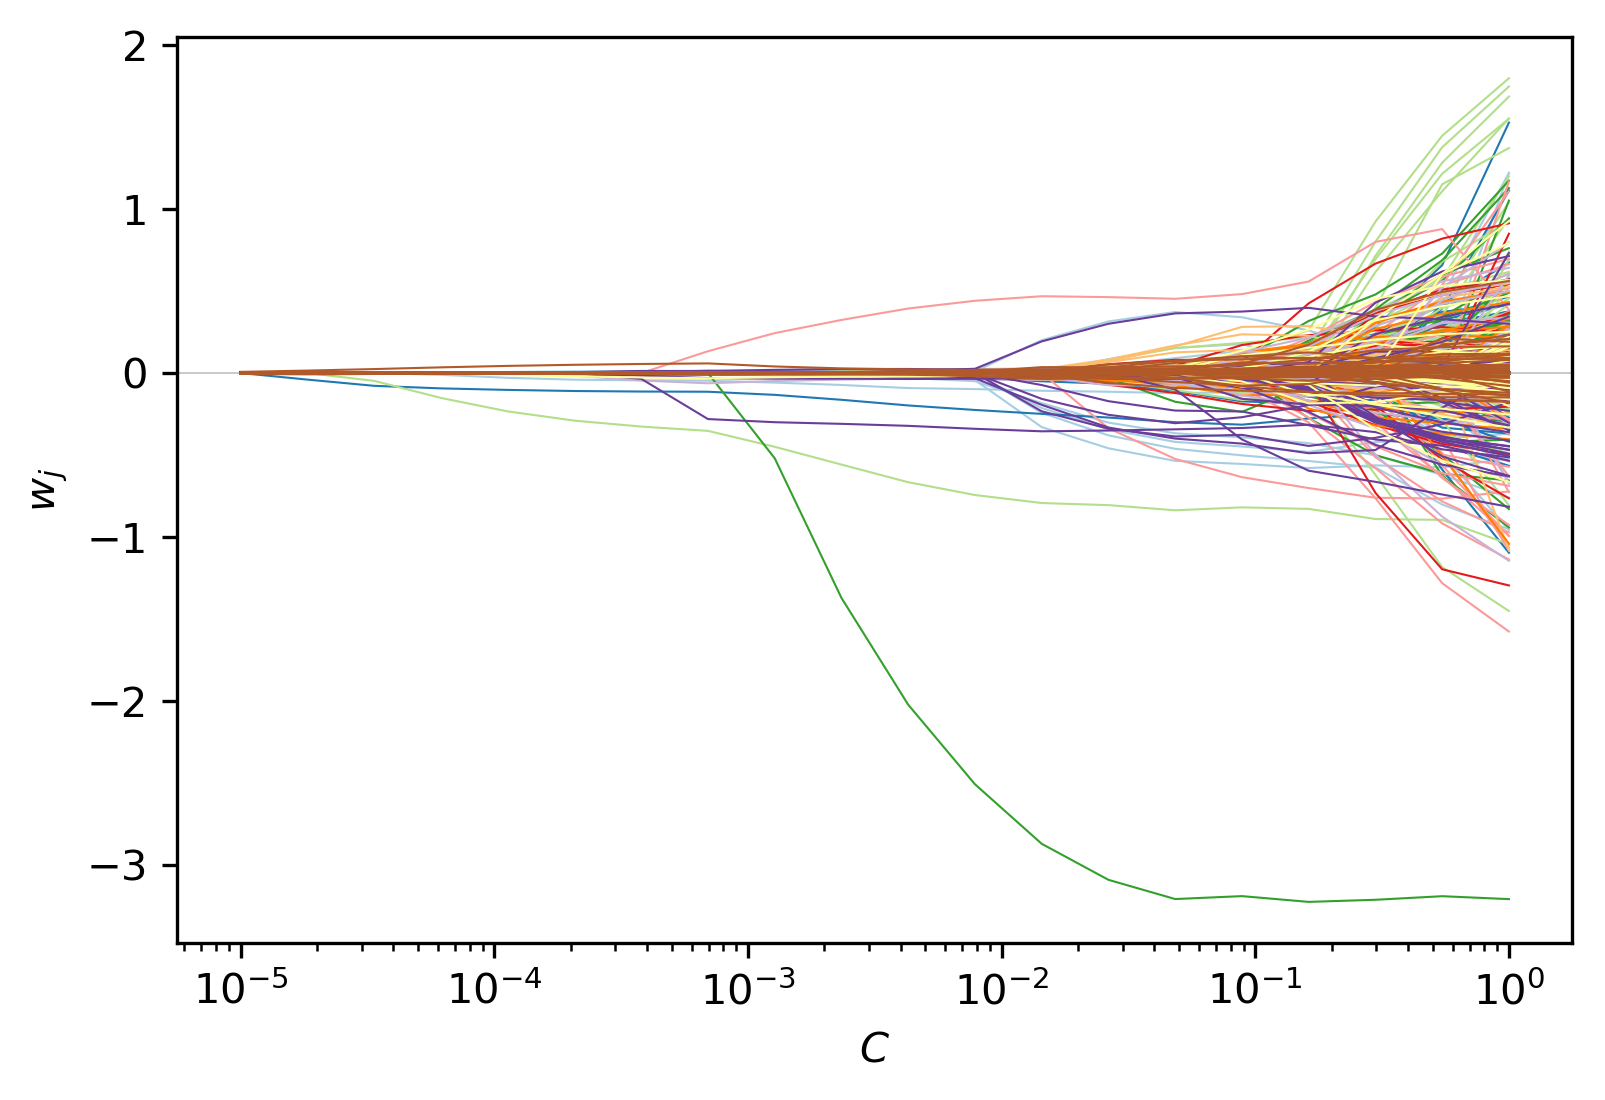

In [14]:
fig = plt.figure(dpi=300)
ax = fig.add_subplot(111)

colormap = plt.cm.Paired
ax.set_color_cycle([colormap(i) for i in np.linspace(0, 1, coefs.shape[0])])
plt.axhline(color='k', linewidth=.1, linestyle='solid') # xaxis

for _coef, _feature in zip(coefs, df0.columns):
    ax.semilogx(C_range, _coef, '-', label=_feature.upper(), linewidth=.5)
    
# lgd = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., ncol=2)
plt.xlabel(r'$C$')
plt.ylabel(r'$w_j$');

Check which coefs detach from 0 first.

In [10]:
features = df0.columns
nonzero = []
for c in coefs.T:
    nonzero_id = np.where(c.ravel() != 0)[0]
    for f in features[nonzero_id]:
        if f not in nonzero:
            nonzero.append(f)

for i, n in enumerate(nonzero):
    print('{}) {}'.format(i+1, n.upper()))

1) R1T
2) T0G
3) AGE
4) 3L1
5) P1B
6) 2O4
7) 3O
8) T3E
9) S1E
10) P0T
11) 1I0
12) H0
13) I2
14) E0E
15) R0P
16) T4
17) L2I
18) L0P
19) G3G
20) E0I
21) R0T
22) 1G0
23) D2P
24) R3
25) D0G
26) T0S
27) 3I0
28) 3P
29) T2E
30) L3
31) I1S
32) 2R1
33) G1
34) L2O
35) S4
36) G1G
37) P0G
38) 3S3
39) L2L
40) B2B
41) I
42) G0D
43) 0S3
44) 4I3
45) D2S
46) D2I
47) O3L
48) G4
49) P
50) T2G
51) R
52) T3R
53) L0T
54) 3B
55) 2
56) 0R
57) 1D1
58) P0
59) 0P2
60) 0T2
61) B4
62) P4G
63) O3P
64) E2D
65) S0G
66) L2P
67) 4E3
68) T2D
69) G1O
70) T1T
71) G1L
72) I0S
73) D0I
74) I3G
75) L3O
76) T0E
77) T0R
78) P2G
79) 4E0
80) 3O4
81) D1P
82) I2P
83) G3R
84) G3L
85) R0R
86) 2I3
87) D
88) L3E
89) P3B
90) 4L
91) I1G
92) SEX
93) 1P3
94) 2R0
95) 1O2
96) 3T
97) 1T1
98) P4I
99) O2D
100) G3P
101) S4T
102) D4P
103) 1B
104) D0D
105) 4L3
106) T0I
107) L0L
108) L0E
109) G0I
110) E1I
111) G0T
112) G0R
113) P2R
114) G3T
115) S
116) 0L
117) O0G
118) G3D
119) 2G1
120) 2G3
121) 2D2
122) D2R
123) I1R
124) I1O
125) D2D
126) G2
127) 